<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   0.456601376346254  499 non-null    float64
 1   0.432806409224108  499 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
None
   0.456601376346254  0.432806409224108
0           0.611378           0.528625
1           0.450299           0.711606
2           0.639015           0.460744
3           0.628957           0.323470
4           0.566210           0.289358
Shape of the dataset: (499, 2)


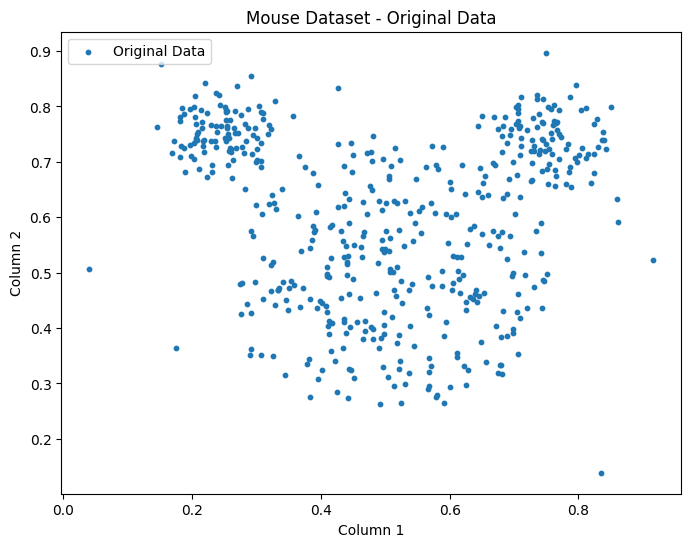

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


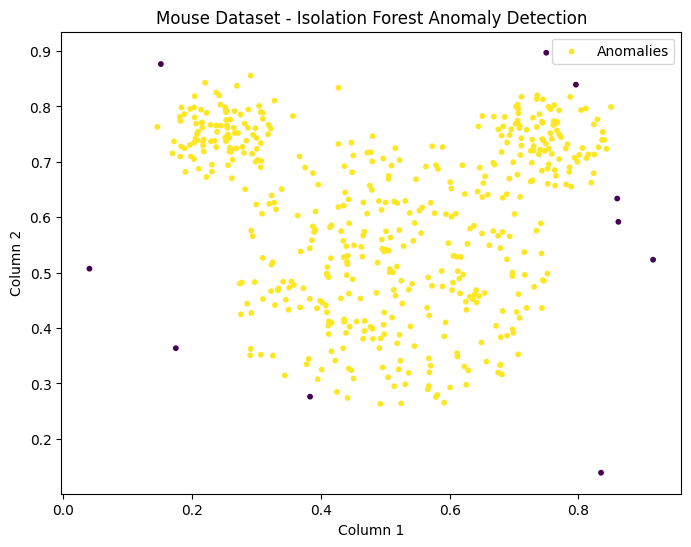

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the Mouse dataset from the local path
file_path_mouse = "/content/mouse.txt"
mouse_data = pd.read_csv(file_path_mouse, delimiter=" ")

# Display information about the dataset
print(mouse_data.info())

# Display the first few rows of the dataset
print(mouse_data.head())

# Print the shape of the dataset
print("Shape of the dataset:", mouse_data.shape)

# Plot the original data
plt.figure(figsize=(8, 6))

# Assuming there are only two columns, use positional indexing based on the shape of the dataset
if mouse_data.shape[1] >= 2:
    plt.scatter(mouse_data.iloc[:, 0], mouse_data.iloc[:, 1], s=10, label="Original Data")
    plt.title("Mouse Dataset - Original Data")
    plt.xlabel("Column 1")
    plt.ylabel("Column 2")
    plt.legend()
    plt.show()
else:
    print("The dataset does not have at least two columns.")

# Apply Isolation Forest for anomaly detection
if mouse_data.shape[1] >= 2:
    model = IsolationForest(contamination=0.02, random_state=42)
    mouse_data['anomaly'] = model.fit_predict(mouse_data.iloc[:, :2])

    # Plot the data with anomalies highlighted
    plt.figure(figsize=(8, 6))
    plt.scatter(mouse_data.iloc[:, 0], mouse_data.iloc[:, 1], s=10, c=mouse_data['anomaly'], cmap='viridis', label="Anomalies")
    plt.title("Mouse Dataset - Isolation Forest Anomaly Detection")
    plt.xlabel("Column 1")
    plt.ylabel("Column 2")
    plt.legend()
    plt.show()
else:
    print("Cannot perform anomaly detection. The dataset does not have at least two columns.")
